## Data pre-processing & exploratory data analysis (EDA) 

### Adapted from [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Yury Kashnitsky. Translated and edited by Christina Butsko, Yuanyuan Pao, Anastasia Manokhina, Sergey Isaev and Artem Trunov. This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

### Data pre-processing 

Data pre-processing is the process of transforming the raw data into a clean data set. Raw, real-world data is messy. Not only may it contain errors and inconsistencies, but it is often incomplete, and doesn’t have a regular, uniform design. The dataset is pre-processed in order to check and fix missing values, noisy data, and other inconsistencies before feeding it into a ML algorithm. The goal of data pre-processing is to improve the quality of the data and to make it more suitable for the specific data mining task.

### Visualizations

In the field of Machine Learning, *data visualization* is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools. Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.

All in all, visualization is a relatively fast way to learn something new about your data. Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox. In this notebook, we are going to get hands-on experience with visual exploration of data using popular libraries such as `pandas`, `matplotlib` and `seaborn`.


<img src="visual.png"  width=50% />


#### Loading Libraries 

First we need to load the required Python libraries. Libraries are like extensions to the base python that add functionality or help to make tasks more convenient to do. We will load some libraries that will boost your data handling capacity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 100)
pd.set_option("display.precision", 2)

print("libraries all imported, ready to go")

libraries all imported, ready to go



In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables while `print(df.head())` is less nicely formatted. By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `pd.set_option()` function as shown in the example above:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```

#### Loading the data 

We’ll demonstrate the main methods in action by analyzing a [dataset](https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/data?select=telecom_churn.csv) on the churn rate of telecom operator clients. 

- As a first step, we load the dataset with pandas. To achieve this you will use the `read_csv()` method. We just need to point to the location of the dataset and indicate under what name we want to store the data,  and pandas will do the rest. 

- For consistency, use the name **df** to store the output of `read_csv()` . At a first stage, the data has only been loaded. Let's have a look at the top few lines - we can use the `.head()` method to achieve this.

In [2]:
# Read the data using the .read_csv() function from pandas (pd) into a DataFrame named "df" 
# Print out the first 5 rows of the DF using the function .head()
# Try printing more rows of the DF (e.g. 10 or 20) using the function head() to get a sense of the data

########## FILL IN YOUR SOLUTION HERE ########## 

df = pd.read_csv("./telecom_churn.csv")
df.head(10)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                NaN             Yes   
1    OH             107        415                NaN             Yes   
2    NJ             137        415                NaN              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   
5    AL             118        510                Yes              No   
6    MA             121        510                 No             Yes   
7    MO             147        415                Yes              No   
8    LA             117        408                 No              No   
9    WV             141        415                Yes             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   
7                      0              157.0               79   
8                      0              184.5               97   
9                     37              258.6               84   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   
7             26.69              103.1               94              8.76   
8             31.37              351.6               80             29.89   
9             43.96              222.0              111             18.87   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6

##### Detect the target/class (dependent) variable y: 

Note: The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a **target**.

##### Data dimensionality 
Let’s have a look at data dimensionality using `shape` (Note: `.shape` does not take any parentheses!):

In [3]:
# Print the dimensionality of the DataFrame df 

########## FILL IN YOUR SOLUTION HERE ########## 

print(df.shape)

(3333, 20)


From the output, we can see that the table contains 3333 rows and 20 columns.

Now let’s try printing out the column names using `columns`:

In [4]:
# Print the column names of the DataFrame df 

########## FILL IN YOUR SOLUTION HERE ########## 

print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe (including the type of data stucture, column data types and number of non-null values per column, among others): 

In [5]:
# Use the info() function on the DataFrame df

########## FILL IN YOUR SOLUTION HERE ########## 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3330 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Check for missing values   

We can see from the results above that there are some missing values in our DataFrame in the feature "International plan". As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

- `isnull()`: Generate a boolean mask indicating missing values
- `notnull()`: Opposite of `isnull()`
- `dropna()`: Return a filtered version of the data
- `fillna()`: Return a copy of the data with missing values filled or imputed 

In [6]:
# Get the counts of missing values for each column in the "df" DataFrame

########## FILL IN YOUR SOLUTION HERE ########## 

nan_in_df = df.isnull().sum()
nan_in_df

State                     0
Account length            0
Area code                 0
International plan        3
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### Drop duplicates

A dataset may include data objects that are duplicates or almost duplicates of one another. You can use the `.drop_duplicates()` function to return the deduplicated data: 

In [7]:
# Drop duplicates (if the exist) either inplace=True OR with assignment (assign back to df to overwrite the results) 
# Extra sanity check: print the shape of df before and after the drop.

########## FILL IN YOUR SOLUTION HERE ########## 


print(df.shape) 
df.drop_duplicates(inplace=True)
print(df.shape)

(3333, 20)
(3333, 20)


#### Split to input variables and class vector

We first start by setting the X matrix (input features) and y vector (class target):

In [8]:
# The most common step across all Supervised Machine Learning models in Python

# Store the feature data into a new variable named "X" - Extract all columns **except** 
# from the label column ('Churn') using either indexing (.loc / .iloc) or, easier, df.drop() with axis=1

########## FILL IN YOUR SOLUTION HERE ########## 

X = df.drop('Churn', axis=1)

# Store the target data (label/class column) into a new variable named "y"
# Get only the label (class) column 'Churn' from df 

########## FILL IN YOUR SOLUTION HERE ########## 

y = df['Churn']


# Print the dimensions (using "shape") for both X and y 

########## FILL IN YOUR SOLUTION HERE ########## 

print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

X dimensions:  (3333, 19)
y dimensions:  (3333,)


#### Investigate the class frequencies
An important aspect to understand before applying any classification algorithm is how the output labels are distributed. Are they evenly distributed or not? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good.

##### 1. Tabular format - frequency table

In [9]:
# In order to check the distribution of the binary class, use either the function .value_counts() on y 
# or .groupby() to get the counts per class for the target variable 


########## FILL IN YOUR SOLUTION HERE ########## 

y.value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

2850 users out of 3333 are *loyal* as their `Churn` value is False. To calculate fractions, pass `normalize=True` to the `value_counts()` function. By default, the entries in the output are sorted from the most to the least frequently-occurring values.

##### What do you observe??
In our case, the data are **imbalanced**; that is, our two target classes, churned and non-churned customers, are not represented equally in the dataset. As we will see in the following courses, this fact may imply some restrictions on measuring the classification performance.

###### 2. Visualization - class frequencies
The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function `countplot()`. There is another function in `seaborn` that is somewhat confusingly called `barplot()` and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature. 

Let's plot the distributions for categorical variables:

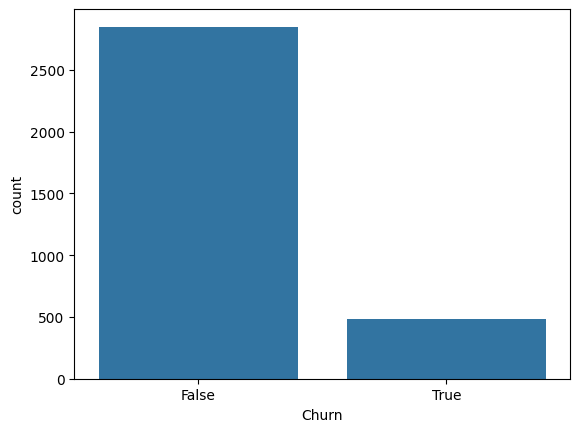

In [10]:
# Use the sns.countplot() function from seaborn to plot the feature "Churn" (argument x="Churn") from df

########## FILL IN YOUR SOLUTION HERE ########## 

sns.countplot(x="Churn", data=df);

The chart above vividly illustrates the **imbalance** in our target variable.

##### Mapping (encoding) the categorical variable

In order for the class variable to be in machine-readable form and ready to be used by ML models, it needs to be encoded in a numerical format. `LabelEncoder` from `sklearn` can be used to encode target labels with value between `0` and `n_classes-1`. **This transformer should be used to encode ONLY target values (y variable), and not the input features in X** (in which case, we can use One Hot Encoding or other ways of encoding). 

Read more about [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [Transforming the prediction variable(y)](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [11]:
# Convert the categorical values within y into numbers using the LabelEncoder() from sklearn
# The values will be converted from True / False to integers 1 and 0.


# Initialise a LabelEncoder object and store into a variable named "le"

########## FILL IN YOUR SOLUTION HERE ########## 


le = LabelEncoder()

# Call the .fit_transform() function from the "le" label encoder object created above on the y data 
# and assign the returned encoded labels back to y to overwrite its entries. 

# The .fit_transform() function takes a categorical column and converts/maps it to numerical values.
# Display the entries of y (after the application of LabelEncoder) 

########## FILL IN YOUR SOLUTION HERE ########## 

y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])


### Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.


##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

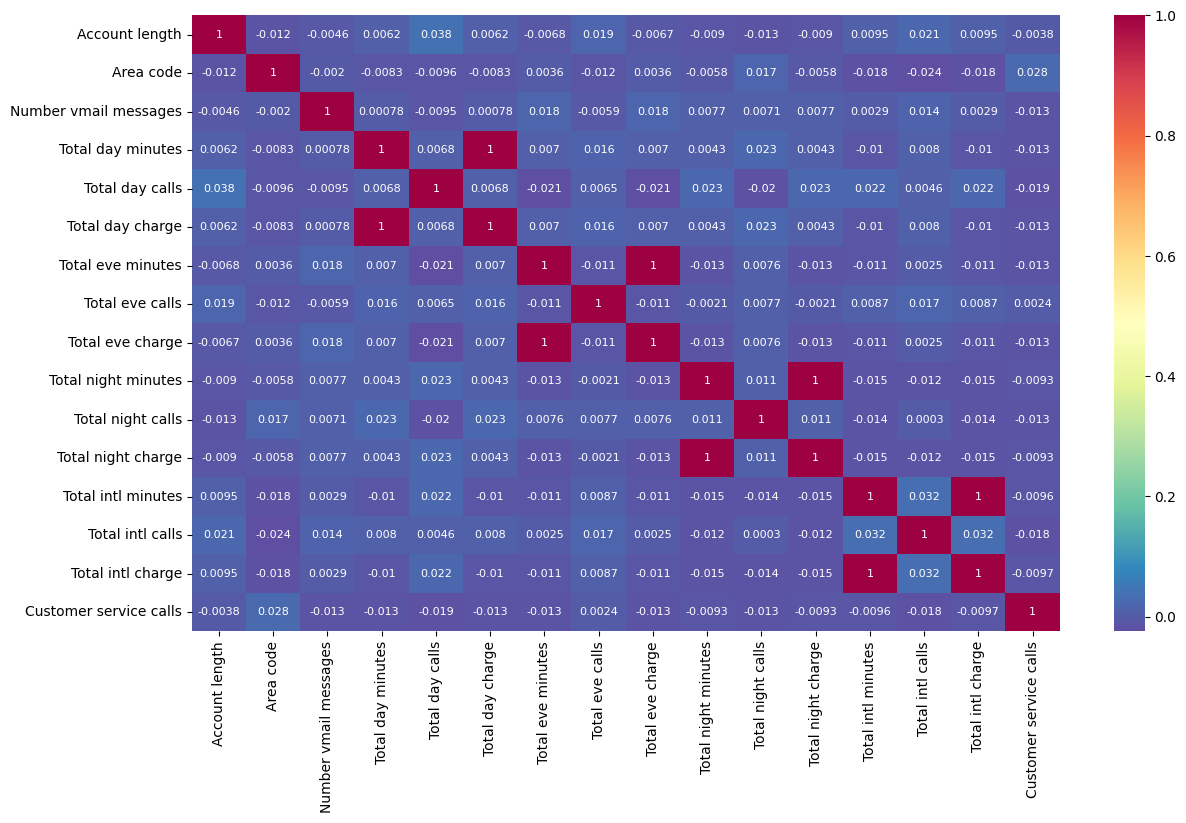

In [12]:
# Calculate the correlation matrix of the numerical_features from the X DataFrame using .select_dtypes('number').corr() 
# and save it in a variable called 'corr_matrix' 
# Then pass the corr_matrix to the sns.heatmap() function for plotting. 

# Optional: you can use f, ax = plt.subplots(figsize=(14, 8))  
# Optional sns.heatmap arguments : annot=True,  annot_kws={'size': 8} and cmap="Spectral_r" 

########## FILL IN YOUR SOLUTION HERE ########## 


corr_matrix = X.select_dtypes('number').corr()

f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");

From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). 

##### Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible. Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:

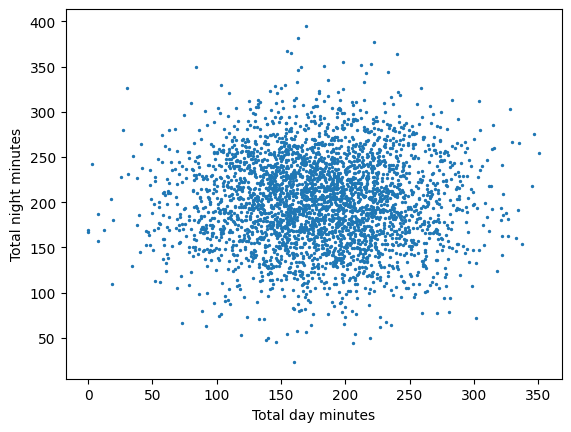

In [13]:
# Use the plt.scatter() function from matplotlib to plot the features "Total day minutes" 
# and "Total day minutes" from the dataframe X against each other in a scatterplot. Also add "s=2" for the size. 
# Additionally, you can use the plt.xlabel() and plt.ylabel() functions to set the axes' labels

########## FILL IN YOUR SOLUTION HERE ########## 

plt.scatter(X["Total day minutes"], X["Total night minutes"], s=2)
plt.xlabel("Total day minutes")
plt.ylabel("Total night minutes");

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library. The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

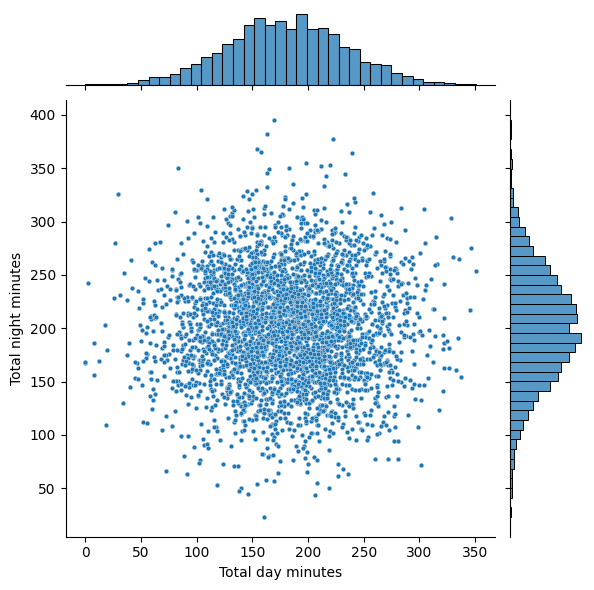

In [14]:
# Use the .jointplot() function from seaborn to plot "Total day minutes" vs. "Total night minutes"
# from the X dataframe with kind="scatter" and size s=12 

########## FILL IN YOUR SOLUTION HERE ########## 


sns.jointplot(x="Total day minutes", y="Total night minutes", data=X, kind="scatter", s=12 );

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

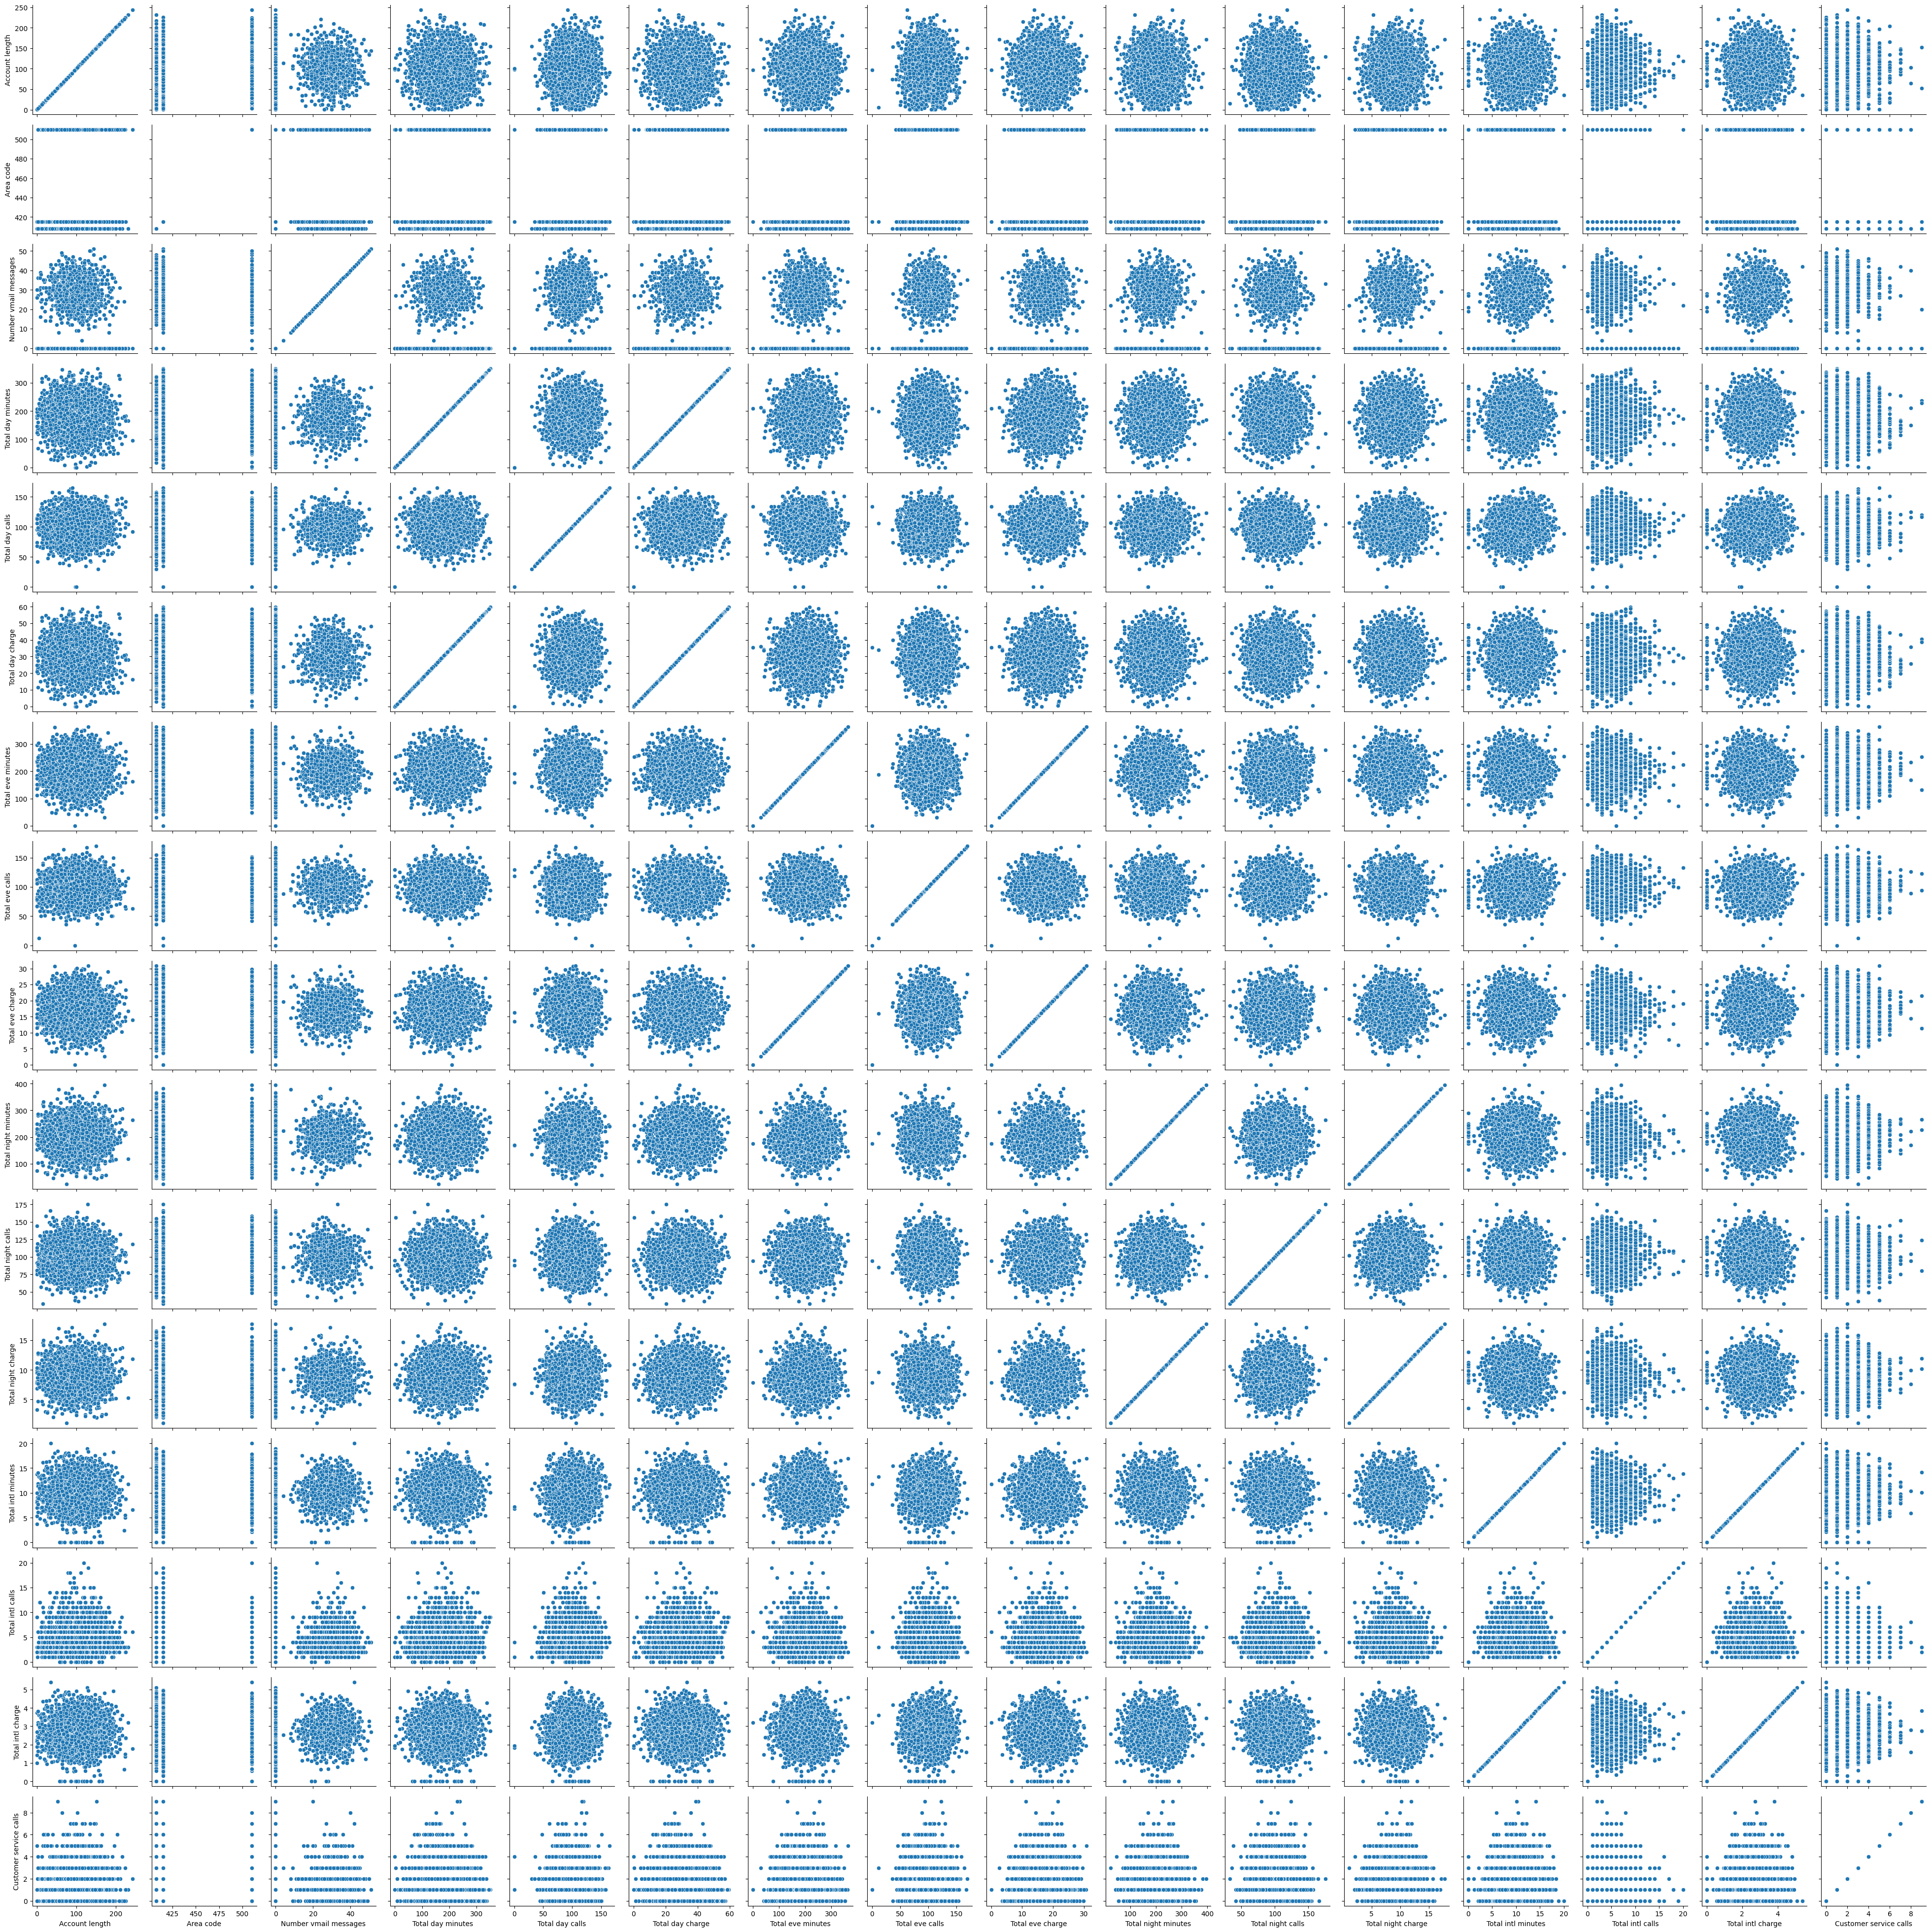

In [15]:
# This may take a bit of time to execute 

g = sns.PairGrid(X)
g.map(sns.scatterplot);

### Mapping Categorical Features

Most ML libraries and tools will only accept *numerical values* as their input. In the case where we have categorical features present, we need to represent them as numerical values. Unlike the class label, when dealing with categorical input features, typically one converts each categorical feature using “one-hot encoding”. The input in one-hot encoding is the vector of discrete categorical values, and the output will be a sparse matrix where each column corresponds to one possible value of one feature.

In our example, the feature State is a categorical feature with values such as ["KS", "OH", "NJ", "OK"] etc. Such features can be easily mapped to dummy variables which could be expressed as [0, 1, 2]. Can you spot any problem though with this approach? Even though the country values do not come in any particular order, a machine learning algorithm will now assume that "KS" is larger than "OH", and "OH" is larger than "NJ", and so on. Although this assumption is incorrect, the algorithm could still produce useful results. However, those results would not be optimal.

The correct approach in this case is to apply one-hot encoding. This estimator transforms each unique categorical value of a single input categorical feature to a new dummy feature. So, for our 51 unique country values , we will end up with 51 new dummy features after one-hot-encoding. There are plenty of libraries and functions that are used for one-hot encoding. 

In this example, we will use the `get_dummies()` function from pandas:

In [16]:
# Use the function .unique() on the X['State'] column 

########## FILL IN YOUR SOLUTION HERE ########## 


X['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [17]:
# Use the function .nunique() on the X['State'] column 

########## FILL IN YOUR SOLUTION HERE ########## 


X['State'].nunique()

51

In [18]:
# Apply one-hot encoding to the categorical feature Country

# Create a new variable "states" using just the entries of X['State'] 
# As a second step, apply pd.get_dummies(states, dtype=int) and assign back to the variable 'states' to overwrite the entries of the dataframe.  
# Preview the first rows of states


########## FILL IN YOUR SOLUTION HERE ########## 


states = X['State']
states = pd.get_dummies(states, dtype=int)
states.head(10)

AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0   0   0   0   0  
5   0   0   0   0   0   0   0   0   0   0   0   0   0  
6   0   0   0   0   0   0   0   0   0   0   0   0   0  
7   0   0   0   0   0   0   0   0   0   0   0   0   0  
8   0   0   0   0   0   0   0   0   0   0   0   0   0  
9   0   0   0   0   0   0   0   0   0   0   0   1   0

At this stage, we want to update in our Dataframe the categorical feature "State" with the result of one-hot encoding. Remember, that are going to remove a single feature, and add 51 new dummy variables created by one-hot encoding.

In [19]:
# Remove (drop) the column 'State' from the dataframe X (you may need to set the axis accordingly!)
# Drop with inplace=True OR with assignment back to X 

# Use .join() on X with the result of one-hot encoding from the dataframe states you created above. 
# Assign back to X to overwrite the entries. Preview the first few rows of X 

########## FILL IN YOUR SOLUTION HERE ########## 


X = X.drop('State', axis = 1)
X = X.join(states)
X.head()

Account length  Area code International plan Voice mail plan  \
0             128        415                NaN             Yes   
1             107        415                NaN             Yes   
2             137        415                NaN              No   
3              84        408                Yes              No   
4              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  \
0                       1   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                       1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2                       0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3                       2   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                       3   0   0   0   0   0   0   0   0   0   0   0   0   0   

   ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
3   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0

We can convert the values "Yes"/"No" of the binary features into numerical values using [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):

In [20]:
# Converting binary features. In this case, we could use either one hot encoding as above  
# or simply use the .map() functionality shown below

X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"]    = X["Voice mail plan"].map({"Yes": 1, "No": 0})
X.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                 NaN                1   
1             107        415                 NaN                1   
2             137        415                 NaN                0   
3              84        408                 1.0                0   
4              75        415                 1.0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  \
0                       1   0   0   0   0   0   0   0   0   0   0   0   0   0   
1                       1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2                       0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3                       2   0   0   0   0   0   0   0   0   0   0   0   0   0   
4                       3   0   0   0   0   0   0   0   0   0   0   0   0   0   

   ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
3   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0

### Train-Test Split

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split our dataset into two disjoint sets: train and test (Holdout method).

Use `sklearn`’s `train_test_split()` function to randomly split the data into train and test sets (visit the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the  [model cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)). Typically, 20% test size seems reasonable enough for checking the performance of models.

**Note: it’s good practice to split the train and test sets before doing any feature engineering and/or scaling to avoid data leakage!!**


In [21]:
# Use the .train_test_split() function from sklearn and pass the following arguments: 
# (1) the X matrix (2) the y vector (3) test_size=0.2 (4) random_state=1 (for result reproducibility)
# Store the results into the new variables X_train, X_test, y_train, y_test (simultaneously)


########## FILL IN YOUR SOLUTION HERE ########## 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


# Print the shape of X_train, X_test, y_train, y_test 
# Do the X and y variables for train and test respectively match? 

########## FILL IN YOUR SOLUTION HERE ########## 

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (2666, 69) (2666,)
Shape of x_test and y_test:  (667, 69) (667,)


#### Fill in the missing values 

In the case of missing values, we should take care to replace them in the dataset as they prevent machine learning algorithms to run. There are many functions such as `.fillna()` and `.SimpleImputer` from `sklearn` as well as **many strategies** to help with missing data and they depend on whether the missing data is **numeric** or **categorical**.  

What strategy is best for you problem very much depends on the specifics of your dataset. However, generally speaking it is not worth to remove large chunks of data.

- simply removing rows where there is missing data (e.g. `dropna()` can achieve this)
- imputing the values with a summary statistic such as mean or median or most frequent value (e.g. `.fillna()` from `pandas` or `.SimpleImputer()` from `sklearn` module)
- replace the values with a reasonable estimate

In [22]:
# Use the .unique() function on the column "International plan" from X_train to get the unique values

########## FILL IN YOUR SOLUTION HERE ########## 

X_train["International plan"].unique()

array([ 0.,  1., nan])

In [23]:
# In both the X_train and X_test use the .fillna() function from pandas to fill in the empty values (NAs) 
# of the column 'International plan' with a value from the .unique() output above. 

# Do not forget to assign it back as the new value of that column 
# e.g. X_train['International plan'] = ..... 
# Alternatively, you can use the argument inplace=True within .fillna()


########## FILL IN YOUR SOLUTION HERE ########## 


X_train["International plan"] = X_train['International plan'].fillna(1)
X_test["International plan"]  = X_test['International plan'].fillna(1)

Alternative solution using the `SimpleImputer()` functionality from `sklearn``

In [24]:
#### Alternative solution using the SimpleImputer() functionality from sklearn

# imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)

# X_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
# X_test  = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)

### Scaling 


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [25]:
# Apply the .describe() function on the X_train

########## FILL IN YOUR SOLUTION HERE ########## 

X_train.describe()

Account length  Area code  International plan  Voice mail plan  \
count         2666.00    2666.00              2666.0          2666.00   
mean           100.82     437.03                 0.1             0.27   
std             40.20      42.30                 0.3             0.44   
min              1.00     408.00                 0.0             0.00   
25%             73.00     408.00                 0.0             0.00   
50%            100.00     415.00                 0.0             0.00   
75%            127.00     510.00                 0.0             1.00   
max            243.00     510.00                 1.0             1.00   

       Number vmail messages  Total day minutes  Total day calls  \
count                2666.00            2666.00          2666.00   
mean                    8.00             179.68           100.38   
std                    13.69              54.46            20.10   
min                     0.00               0.00             0.00   
25%                     0.00             144.05            87.00   
50%                     0.00             179.85           101.00   
75%                    19.00             216.00           114.00   
max                    51.00             350.80           165.00   

       Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
count           2666.00            2666.00          2666.00           2666.00   
mean              30.55             200.63            99.84             17.05   
std                9.26              50.77            19.92              4.32   
min                0.00              31.20            12.00              2.65   
25%               24.49             165.80            87.00             14.09   
50%               30.57             200.25           100.00             17.02   
75%               36.72             235.30           113.00             20.00   
max               59.64             361.80           170.00             30.75   

       Total night minutes  Total night calls  Total night charge  \
count              2666.00            2666.00             2666.00   
mean                200.94              99.70                9.04   
std                  50.72              19.69                2.28   
min                  23.20              33.00                1.04   
25%                 167.22              86.00                7.52   
50%                 200.45             100.00                9.02   
75%                 234.78             113.00               10.57   
max                 395.00             175.00               17.77   

       Total intl minutes  Total intl calls  Total intl charge  \
count             2666.00           2666.00            2666.00   
mean                10.25              4.52               2.77   
std                  2.76              2.47               0.75   
min                  0.00              0.00               0.00   
25%                  8.50              3.00               2.30   
50%                 10.30              4.00               2.78   
75%                 12.07              6.00               3.26   
max                 20.00             20.00               5.40   

       Customer service calls       AK       AL       AR       AZ        CA  \
count                 2666.00  2666.00  2666.00  2666.00  2666.00  2.67e+03   
mean                     1.55     0.02     0.02     0.02     0.02  9.75e-03   
std                      1.31     0.13     0.15     0.13     0.13  9.83e-02   
min                      0.00     0.00     0.00     0.00     0.00  0.00e+00   
25%                      1.00     0.00     0.00     0.00     0.00  0.00e+00   
50%                      1.00     0.00     0.00     0.00     0.00  0.00e+00   
75%                      2.00     0.00     0.00     0.00     0.00  0.00e+00   
max                      9.00     1.00     1.00     1.00     1.00  1.00e+00   

            CO       CT       DC       DE       FL       GA       HI       IA

- What do you observe when visualizing the following plot? 

/var/folders/5g/fcbnwv7s16344nm4h15fl6rc0000gn/T/ipykernel_16420/1533545362.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


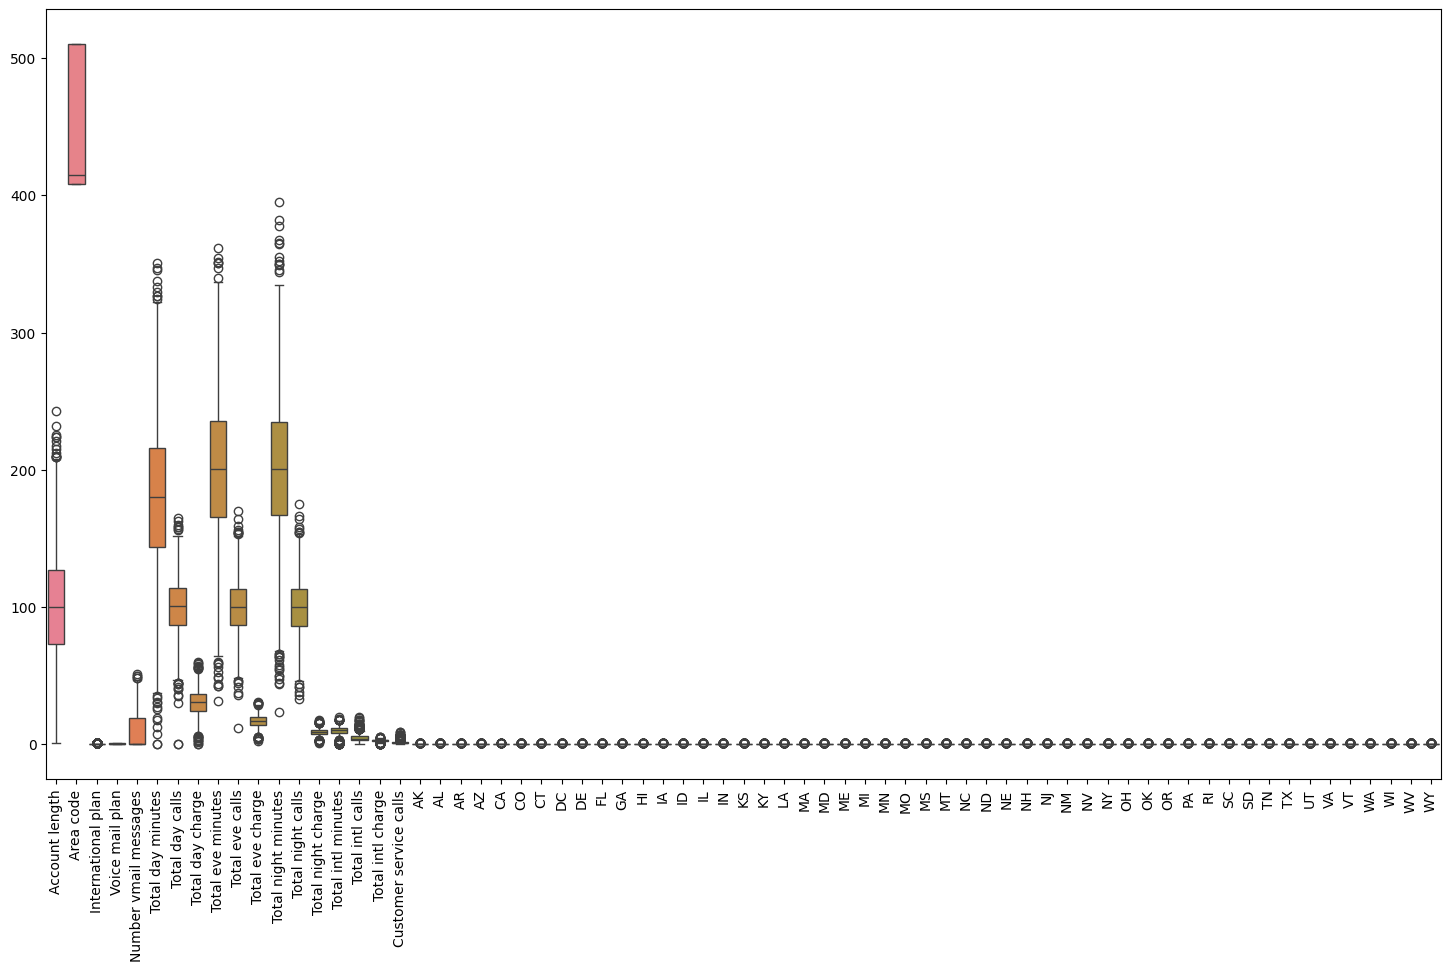

In [26]:
# Visualise the X_train data in a seaborn boxplot 
# Optional: set the plt.figure(figsize=(18,10)) and ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

########## FILL IN YOUR SOLUTION HERE ########## 

plt.figure(figsize=(18,10))
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

#### StandardScaler 

Prior to feeding our data to any other supervised or unsupervised learning technique, we need to **scale** our data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.

**NOTE: We should only fit the scaler on the train set and use it to transform the test set to avoid data leakage.** 

In [27]:
# Instantiate the StandardScaler() from sklearn 
# Store into a variable named "scaler" 


########## FILL IN YOUR SOLUTION HERE ########## 


scaler = StandardScaler()  


# Fit the scaler on the X_train data - Use the scaler.fit_transform() on the X_train set 
# Assign the result back to the variable X_train 

########## FILL IN YOUR SOLUTION HERE ########## 


X_train = scaler.fit_transform(X_train)


# Transform (do not fit!) the test dataset using the (fitted) scaler - 
# Use the scaler.transform() on the X_test
# Assign the result back to the variable X_test

########## FILL IN YOUR SOLUTION HERE ########## 


X_test  = scaler.transform(X_test)

/var/folders/5g/fcbnwv7s16344nm4h15fl6rc0000gn/T/ipykernel_16420/641590435.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


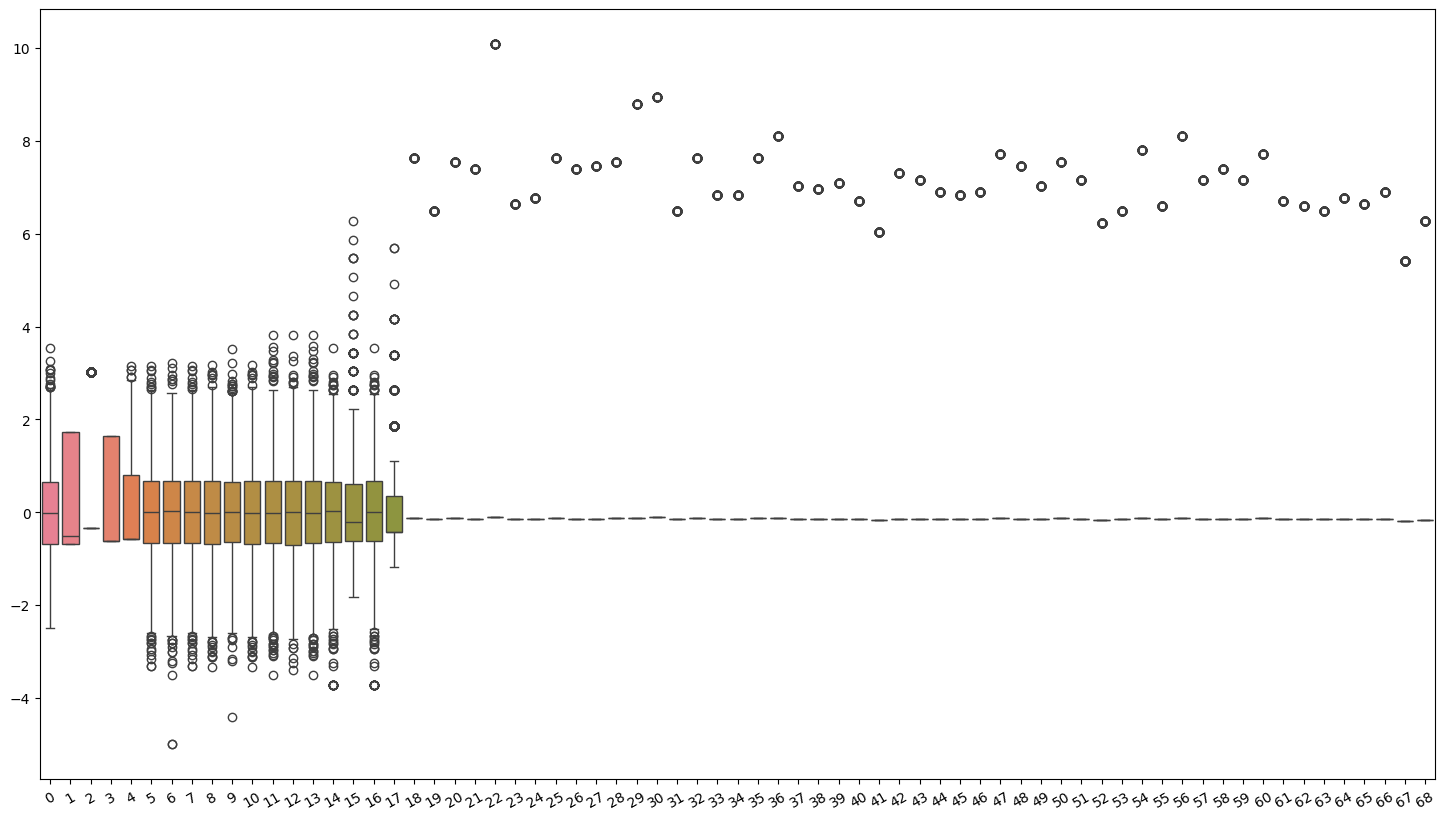

In [28]:
# What do you observe when running the code below? 

plt.figure(figsize=(18,10))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

## Useful resources

* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* ["Merging DataFrames with pandas"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - a tutorial by Max Plako within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
* ["Handle different dataset with dask and trying a little dask ML"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/dask_objects_and_little_dask_ml_tutorial_iknyazeva.ipynb) - a tutorial by Irina Knyazeva within mlcourse.ai
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
* Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68) based on this notebook
* If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/322626/) on Habr.com with ~ the same material. And a [lecture](https://youtu.be/dEFxoyJhm3Y) on YouTube
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn
